# Introductory tutorial

## tespy overview

- system of equations to describe fluid state in model
- solve for
  - material flows: mass flow, pressure, enthalpy of each connection point
    between two components
  - non-material flows (power,heat): energy flow of each connection point
    between two components
  - component variables: specific components can have variables, e.g.
    compressor RPM, pipe diameter
- equation based solver: specifications can be swapped, no change to model or
  solving procedure required
- offdesign simulation: functions to make relation between actual state and 
  design state of the system
- inject user defined equations into the solver

## topics

- structure of models
- set up a simple model
- make specifications to the model and solve it
- retrieve results from the model
- postprocessings: cycle diagrams and exergy analysis

## structure of models

- Network
- Components
- Connections/PowerConnections/(HeatConnections)
- UserDefinedEquations
- FluidPropertyWrappers

### Network

In [1]:
from tespy.networks import Network


nw = Network()  # sometimes you'll see Network(fluids=[...]), that is long outdated, ChatGPT?
nw

In [2]:
nw.units

Network Units
-------------
Quantity                  | Unit      
--------------------------+-----------
temperature               | kelvin    
temperature_difference    | delta_degC
enthalpy                  | J/kg      
specific_energy           | J/kg      
entropy                   | J/kg/K    
pressure                  | Pa        
mass_flow                 | kg/s      
volumetric_flow           | m3/s      
specific_volume           | m3/kg     
power                     | W         
heat                      | W         
quality                   | 1         
vapor_mass_fraction       | 1         
efficiency                | 1         
ratio                     | 1         
length                    | m         
speed                     | m/s       
area                      | m2        
thermal_conductivity      | W/m/K     
heat_transfer_coefficient | W/K       
not specified             | 1         

In [3]:
nw.units.set_defaults(
    temperature="°C",
    pressure="bar",
    power="kW"
)
nw.units

Network Units
-------------
Quantity                  | Unit      
--------------------------+-----------
temperature               | °C        
temperature_difference    | delta_degC
enthalpy                  | J/kg      
specific_energy           | J/kg      
entropy                   | J/kg/K    
pressure                  | bar       
mass_flow                 | kg/s      
volumetric_flow           | m3/s      
specific_volume           | m3/kg     
power                     | kW        
heat                      | W         
quality                   | 1         
vapor_mass_fraction       | 1         
efficiency                | 1         
ratio                     | 1         
length                    | m         
speed                     | m/s       
area                      | m2        
thermal_conductivity      | W/m/K     
heat_transfer_coefficient | W/K       
not specified             | 1         

## Components and connections

In [4]:
from tespy.components import Turbine, Source, Sink
from tespy.connections import Connection


steam_inflow = Source("steam inflow")
turbine = Turbine("turbine")
waste_steam = Sink("waste steam")

c1 = Connection(steam_inflow, "out1", turbine, "in1", label="c1")
c2 = Connection(turbine, "out1", waste_steam, "in1", label="c2")

nw.add_conns(c1, c2)

In [5]:
c1.set_attr(fluid={"Isobutane": 1}, T=175, td_dew=50, m=1)
c2.set_attr(T_dew=30)

In [6]:
turbine.set_attr(eta_s=0.8)

In [7]:
nw.solve("design")


 iter  | residual   | progress   | massflow   | pressure   | enthalpy   | fluid      | component  
-------+------------+------------+------------+------------+------------+------------+------------
 1     | 1.70e+05   | 8 %        | 0.00e+00   | 0.00e+00   | 1.70e+05   | 0.00e+00   | 0.00e+00   
 2     | 4.37e-11   | 100 %      | 0.00e+00   | 0.00e+00   | 4.37e-11   | 0.00e+00   | 0.00e+00   
 3     | 4.37e-11   | 100 %      | 0.00e+00   | 0.00e+00   | 4.37e-11   | 0.00e+00   | 0.00e+00   
 4     | 4.37e-11   | 100 %      | 0.00e+00   | 0.00e+00   | 4.37e-11   | 0.00e+00   | 0.00e+00   
Total iterations: 4, Calculation time: 0.00 s, Iterations per second: 1091.77


In [8]:
nw.print_results()


##### RESULTS (Turbine) #####
+---------+-----------+----------+----------+----------+
|         |         P |       pr |       dp |    eta_s |
|---------+-----------+----------+----------+----------|
| turbine | -8.36e+01 | 1.31e-01 | 2.68e+01 | 8.00e-01 |
+---------+-----------+----------+----------+----------+
##### RESULTS (Connection) #####
+----+-----------+-----------+-----------+-----------+------------+----------------------+
|    |         m |         p |         h |         T |          x | phase                |
|----+-----------+-----------+-----------+-----------+------------+----------------------|
| c1 | 1.000e+00 | 3.088e+01 | 8.477e+05 | 1.750e+02 | -1.000e+00 | state not recognised |
| c2 | 1.000e+00 | 4.047e+00 | 7.641e+05 | 1.159e+02 |  1.000e+00 | g                    |
+----+-----------+-----------+-----------+-----------+------------+----------------------+


In [9]:
nw.results["Connection"]

,m,m_unit,p,p_unit,h,h_unit,T,T_unit,v,v_unit,...,x,x_unit,Td_bp,Td_bp_unit,td_dew,td_dew_unit,td_bubble,td_bubble_unit,Isobutane,phase
c1,1.0,kilogram / second,30.880281,bar,847746.809171,joule / kilogram,175.000000,degree_Celsius,0.015655,m3 / second,...,-1.0,dimensionless,50.000000,delta_degree_Celsius,50.000000,delta_degree_Celsius,-50.000000,delta_degree_Celsius,1.0,state not recognised
c2,1.0,kilogram / second,4.047225,bar,764110.141090,joule / kilogram,115.910051,degree_Celsius,0.131259,m3 / second,...,1.0,dimensionless,85.910051,delta_degree_Celsius,85.910051,delta_degree_Celsius,-85.910051,delta_degree_Celsius,1.0,g


In [10]:
nw.results["Turbine"]

,P,P_unit,pr,pr_unit,dp,dp_unit,eta_s,eta_s_unit
turbine,-83.636668,kilowatt,0.131062,dimensionless,26.833056,bar,0.8,dimensionless


In [11]:
from tespy.components import Generator, PowerSink
from tespy.connections import PowerConnection


generator = Generator("generator")
grid = PowerSink("grid")

e1 = PowerConnection(turbine, "power", generator, "power_in", label="e1")
e2 = PowerConnection(generator, "power_out", grid, "power", label="e2")

nw.add_conns(e1, e2)

In [12]:
generator.set_attr(eta=0.98)

In [13]:
nw.solve("design")


 iter  | residual   | progress   | massflow   | pressure   | enthalpy   | fluid      | component  
-------+------------+------------+------------+------------+------------+------------+------------
 1     | 8.36e+04   | 11 %       | 0.00e+00   | 0.00e+00   | 7.28e-11   | 0.00e+00   | 8.36e+04   
 2     | 3.97e-03   | 93 %       | 0.00e+00   | 0.00e+00   | 7.28e-11   | 0.00e+00   | 3.97e-03   
 3     | 2.03e-10   | 100 %      | 0.00e+00   | 0.00e+00   | 7.28e-11   | 0.00e+00   | 1.16e-10   
 4     | 1.14e-10   | 100 %      | 0.00e+00   | 0.00e+00   | 7.28e-11   | 0.00e+00   | 1.46e-11   
Total iterations: 4, Calculation time: 0.00 s, Iterations per second: 2365.99


In [14]:
nw.results["PowerConnection"]

,E,E_unit
e1,83.636668,kilowatt
e2,81.963935,kilowatt


In [15]:
nw.results["Generator"]

,eta,eta_unit,delta_power,delta_power_unit
generator,0.98,dimensionless,1.672733,kilowatt


In [16]:
e2.set_attr(E=100)
c1.set_attr(m=None)
nw.solve("design")


 iter  | residual   | progress   | massflow   | pressure   | enthalpy   | fluid      | component  
-------+------------+------------+------------+------------+------------+------------+------------
 1     | 1.84e+04   | 19 %       | 2.20e-01   | 0.00e+00   | 7.28e-11   | 0.00e+00   | 0.00e+00   
 2     | 5.97e-09   | 100 %      | 7.24e-14   | 0.00e+00   | 7.28e-11   | 0.00e+00   | 0.00e+00   
 3     | 1.14e-10   | 100 %      | 1.74e-17   | 0.00e+00   | 7.28e-11   | 0.00e+00   | 0.00e+00   
 4     | 1.14e-10   | 100 %      | 1.74e-17   | 0.00e+00   | 7.28e-11   | 0.00e+00   | 0.00e+00   
Total iterations: 4, Calculation time: 0.00 s, Iterations per second: 1486.16


In [17]:
c1.m.val

1.2200487975963188

In [18]:
c1.m.val_with_unit

<Quantity(1.2200488, 'kilogram / second')>

In [19]:
c2.set_attr(T=100, T_dew=None)
nw.solve("design")
c2.p.val


 iter  | residual   | progress   | massflow   | pressure   | enthalpy   | fluid      | component  
-------+------------+------------+------------+------------+------------+------------+------------
 1     | 1.59e+01   | 53 %       | 4.11e-01   | 2.76e+05   | 2.82e+04   | 0.00e+00   | 0.00e+00   
 2     | 2.39e+04   | 18 %       | 2.29e-01   | 3.39e+03   | 9.63e+03   | 0.00e+00   | 0.00e+00   
 3     | 2.20e+03   | 29 %       | 1.99e-02   | 2.35e+02   | 4.17e+01   | 0.00e+00   | 0.00e+00   
 4     | 8.32e-01   | 67 %       | 7.39e-06   | 1.26e-01   | 1.04e-03   | 0.00e+00   | 0.00e+00   
 5     | 1.84e-08   | 100 %      | 8.89e-14   | 7.05e-08   | 2.62e-09   | 0.00e+00   | 0.00e+00   
 6     | 2.83e-10   | 100 %      | 3.77e-15   | 2.61e-09   | 2.90e-10   | 0.00e+00   | 0.00e+00   
Total iterations: 6, Calculation time: 0.01 s, Iterations per second: 887.71


1.9920920759725238

In [20]:
e1.set_attr(E=104)
generator.set_attr(eta=None)
nw.solve("design")
generator.eta.val


 iter  | residual   | progress   | massflow   | pressure   | enthalpy   | fluid      | component  
-------+------------+------------+------------+------------+------------+------------+------------
 1     | 1.96e+03   | 30 %       | 1.74e-02   | 1.31e-09   | 2.03e-10   | 0.00e+00   | 0.00e+00   
 2     | 2.81e-10   | 100 %      | 2.41e-15   | 4.57e-10   | 1.02e-11   | 0.00e+00   | 0.00e+00   
 3     | 2.47e-10   | 100 %      | 8.64e-16   | 6.26e-11   | 2.31e-10   | 0.00e+00   | 0.00e+00   
 4     | 1.44e-10   | 100 %      | 8.22e-16   | 4.57e-10   | 1.02e-11   | 0.00e+00   | 0.00e+00   
Total iterations: 4, Calculation time: 0.01 s, Iterations per second: 680.40


0.9615384615384616

## offdesign

- Apply equations that take design state as reference
- Various defaults implemented, implement your own by
  - changing lookup table data
  - implement user defined equations for the same purpose
  - implement respective component equations

In [21]:
e1.set_attr(E=None)
generator.set_attr(eta=0.98)

c2.set_attr(T=None, T_dew=20)

nw.solve("design")
nw.save("design.json")


 iter  | residual   | progress   | massflow   | pressure   | enthalpy   | fluid      | component  
-------+------------+------------+------------+------------+------------+------------+------------
 1     | 1.69e+04   | 19 %       | 1.21e-01   | 0.00e+00   | 1.68e+04   | 0.00e+00   | 0.00e+00   
 2     | 2.03e+03   | 29 %       | 2.13e-02   | 0.00e+00   | 1.75e-10   | 0.00e+00   | 0.00e+00   
 3     | 2.91e-10   | 100 %      | 4.86e-16   | 0.00e+00   | 1.75e-10   | 0.00e+00   | 0.00e+00   
 4     | 2.57e-10   | 100 %      | 2.94e-17   | 0.00e+00   | 1.75e-10   | 0.00e+00   | 0.00e+00   
Total iterations: 4, Calculation time: 0.00 s, Iterations per second: 1072.64


### offdesign specifications

- automatically unset the specifications in "design"
- automatically set the specifications in "offdesign"
- example:
  - inlet pressure of turbine (combination of td_dew and T) as function of
    cone law instead if explicit specification
  - efficiency of turbine as function of mass flow instead of fixed value
  - note: you have to take the decision, what is design and offdesign!

In [22]:
c1.set_attr(design=["td_dew"])
turbine.set_attr(design=["eta_s"], offdesign=["eta_s_char", "cone"])

nw.solve("offdesign", design_path="design.json")


 iter  | residual   | progress   | massflow   | pressure   | enthalpy   | fluid      | component  
-------+------------+------------+------------+------------+------------+------------+------------
 1     | 3.99e-10   | 100 %      | 4.44e-13   | 2.92e-07   | 4.09e-07   | 0.00e+00   | 0.00e+00   
 2     | 1.70e-10   | 100 %      | 5.97e-16   | 1.13e-09   | 1.10e-09   | 0.00e+00   | 0.00e+00   
 3     | 7.42e-10   | 100 %      | 7.83e-15   | 1.53e-08   | 2.23e-09   | 0.00e+00   | 0.00e+00   
 4     | 7.57e-10   | 100 %      | 6.63e-15   | 1.89e-08   | 4.71e-10   | 0.00e+00   | 0.00e+00   
Total iterations: 4, Calculation time: 0.01 s, Iterations per second: 502.75


In [23]:
import numpy as np


power_range = np.linspace(105, 50)
inlet_pressure_range = []
mass_flow_range = []
turbine_efficiency_range = []

nw.set_attr(iterinfo=False)

for e in power_range:
    e2.set_attr(E=e)
    nw.solve("offdesign", design_path="design.json")
    inlet_pressure_range.append(c1.p.val)
    mass_flow_range.append(c1.m.val)
    turbine_efficiency_range.append(turbine.eta_s.val)

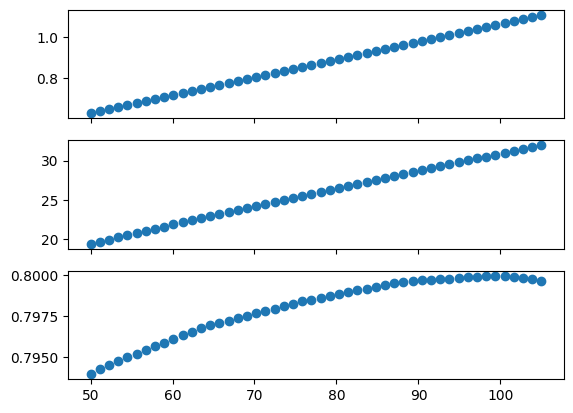

In [24]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(3, sharex=True)

ax[0].scatter(power_range, mass_flow_range)
ax[1].scatter(power_range, inlet_pressure_range)
ax[2].scatter(power_range, turbine_efficiency_range)


### example for heat exchanger

$$\dot Q = kA_\text{design} \cdot f_\text{kA} \cdot \Delta T_\text{log}$$

with $f_\text{kA}$:

$$f_\text{kA} = \frac{2}{\frac{1}{f_1}+\frac{1}{f_2}}$$

and $f_1$, $f_2$:

$$f_1 = \frac{\dot m_\text{hot}}{\dot m_\text{hot,design}}$$
$$f_2 = \frac{\dot m_\text{cold}}{\dot m_\text{cold,design}}$$

Retrieve default data and visualize $f_\text{kA}$

In [25]:
from tespy.tools import load_default_char
from tespy.tools import CharLine


hot_side = load_default_char("HeatExchanger", "kA_char1", "DEFAULT", CharLine)
cold_side = load_default_char("HeatExchanger", "kA_char2", "DEFAULT", CharLine)

In [26]:
import pandas as pd
import itertools


m_ratios = np.linspace(0.1, 1.5)
result = []
m_ratios_hot = []
m_ratios_cold = []

for m_ratio_hot, m_ratio_cold in itertools.product(m_ratios, m_ratios):
    result.append(
        2 / (1 / hot_side.evaluate(m_ratio_hot) + 1 / cold_side.evaluate(m_ratio_cold))
    )
    m_ratios_hot.append(m_ratio_hot)
    m_ratios_cold.append(m_ratio_cold)

Text(0.5, 0, '$\\frac{\\dot m_\\text{hot}}{\\dot m_\\text{hot,design}}$')

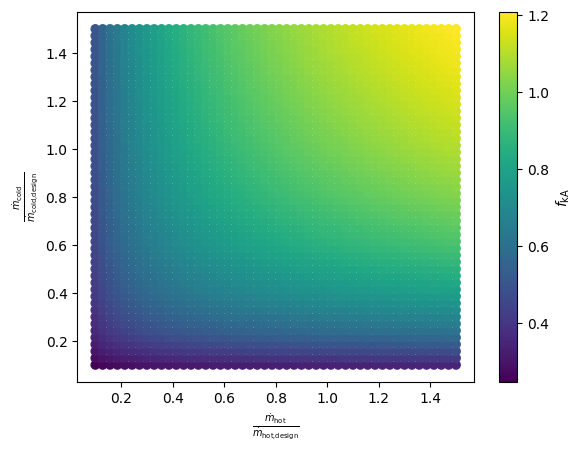

In [27]:
fig, ax = plt.subplots(1)


im = ax.scatter(x=m_ratios_hot, y=m_ratios_cold, c=result)
cax = plt.colorbar(im)
cax.set_label(r"$f_\text{kA}$")
ax.set_ylabel(r"$\frac{\dot m_\text{cold}}{\dot m_\text{cold,design}}$")
ax.set_xlabel(r"$\frac{\dot m_\text{hot}}{\dot m_\text{hot,design}}$")

## postprocessing

### property plots

Example of geothermal ORC with recuperator

In [28]:
from tespy.components import MovingBoundaryHeatExchanger, CycleCloser, Pump, Motor, PowerBus


nw = Network()
nw.units.set_defaults(
    temperature="°C",
    pressure="bar",
    heat="kW",
    power="kW"
)

In [29]:
turbine = Turbine("turbine")
recuperator = MovingBoundaryHeatExchanger("recuperator")
condenser = MovingBoundaryHeatExchanger("condenser")
pump = Pump("pump")
preheater = MovingBoundaryHeatExchanger("preheater")
evaporator = MovingBoundaryHeatExchanger("evaporator")
cc = CycleCloser("cc")

geo_source = Source("geo production")
geo_sink = Sink("geo injection")

air_source = Source("air source")
air_sink = Sink("air sink")

In [30]:
a1 = Connection(geo_source, "out1", evaporator, "in1", label="a1")
a2 = Connection(evaporator, "out1", preheater, "in1", label="a2")
a3 = Connection(preheater, "out1", geo_sink, "in1", label="a3")

b1 = Connection(cc, "out1", turbine, "in1", label="b1")
b2 = Connection(turbine, "out1", recuperator, "in1", label="b2")
b3 = Connection(recuperator, "out1", condenser, "in1", label="b3")
b4 = Connection(condenser, "out1", pump, "in1", label="b4")
b5 = Connection(pump, "out1", recuperator, "in2", label="b5")
b6 = Connection(recuperator, "out2", preheater, "in2", label="b6")
b7 = Connection(preheater, "out2", evaporator, "in2", label="b7")
b8 = Connection(evaporator, "out2", cc, "in1", label="b8")

c1 = Connection(air_source, "out1", condenser, "in2", label="c1")
c2 = Connection(condenser, "out2", air_sink, "in1", label="c2")

nw.add_conns(a1, a2, a3, b1, b2, b3, b4, b5, b6, b7, b8, c1, c2)

generator = Generator("generator")
motor = Motor("motor")
power_bus = PowerBus("bus", num_in=1, num_out=2)
grid = PowerSink("grid")

e1 = PowerConnection(turbine, "power", generator, "power_in", label="e1")
e2 = PowerConnection(generator, "power_out", power_bus, "power_in1", label="e2")
e3 = PowerConnection(power_bus, "power_out1", motor, "power_in", label="e3")
e4 = PowerConnection(motor, "power_out", pump, "power", label="e4")
e5 = PowerConnection(power_bus, "power_out2", grid, "power", label="e5")

nw.add_conns(e1, e2, e3, e4, e5)

generator.set_attr(eta=0.98)
motor.set_attr(eta=0.98)

In [31]:
a1.set_attr(fluid={"water": 1}, T=200, p=35, m=10)
a2.set_attr(T=155)

b1.set_attr(fluid={"Isopentane": 1}, x=1, T=150)

b3.set_attr(td_dew=5, T_dew=30)
b4.set_attr(td_bubble=5)
b7.set_attr(x=0)

c1.set_attr(fluid={"air": 1}, T=10, p=1)
c2.set_attr(T=20)

recuperator.set_attr(dp1=0, dp2=0)
condenser.set_attr(dp1=0, dp2=0)
preheater.set_attr(dp1=0, dp2=0)
evaporator.set_attr(dp1=0, dp2=0)

turbine.set_attr(eta_s=0.8)
pump.set_attr(eta_s=0.7)

In [32]:
nw.solve("design")

b3.set_attr(T_dew=None)
condenser.set_attr(td_pinch=5)

a2.set_attr(T=None)
evaporator.set_attr(td_pinch=5)

nw.solve("design")

nw.print_results()


 iter  | residual   | progress   | massflow   | pressure   | enthalpy   | fluid      | component  
-------+------------+------------+------------+------------+------------+------------+------------
 1     | 1.97e+06   | 0 %        | 3.60e+02   | 0.00e+00   | 6.42e+05   | 0.00e+00   | 2.20e+06   
 2     | 5.69e+06   | 0 %        | 3.86e-09   | 0.00e+00   | 4.52e+05   | 0.00e+00   | 1.25e+06   
 3     | 4.80e-01   | 70 %       | 4.63e-14   | 0.00e+00   | 4.46e-02   | 0.00e+00   | 4.78e-01   
 4     | 1.96e-07   | 100 %      | 4.63e-14   | 0.00e+00   | 2.66e-10   | 0.00e+00   | 1.92e-07   
 5     | 4.36e-10   | 100 %      | 0.00e+00   | 0.00e+00   | 5.02e-11   | 0.00e+00   | 2.52e-10   
Total iterations: 5, Calculation time: 0.00 s, Iterations per second: 1334.92

 iter  | residual   | progress   | massflow   | pressure   | enthalpy   | fluid      | component  
-------+------------+------------+------------+------------+------------+------------+------------
 1     | 5.24e+00   | 58 %   

In [33]:
from fluprodia import FluidPropertyDiagram


diagram = FluidPropertyDiagram("Isopentane")

diagram.set_unit_system(T="°C", p="bar")
diagram.set_isolines_subcritical(0, 200)
diagram.calc_isolines()

In [34]:
from tespy.tools import get_plotting_data


processes, points = get_plotting_data(nw, "b1")
processes = {
    key: diagram.calc_individual_isoline(**value)
    for key, value in processes.items()
    if value is not None
}

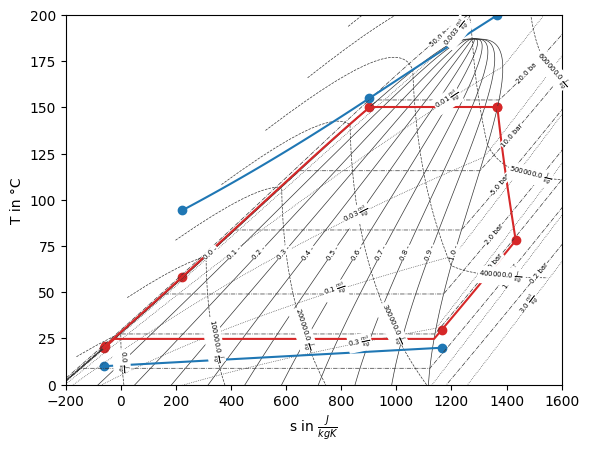

In [35]:
fig, ax = plt.subplots(1)

diagram.draw_isolines(fig, ax, "Ts", -200, 1600, 0, 200)

for label, values in processes.items():
    _ = ax.plot(values["s"], values["T"], label=label, color="tab:red")

for label, point in points.items():
    _ = ax.scatter(point["s"], point["T"], label=label, color="tab:red")


from tespy.tools.plotting import get_heatexchanger_secondary_Ts


other_processes, other_points = get_heatexchanger_secondary_Ts(nw, "b1")
for data in other_processes.values():
    for label, values in data.items():
        _ = ax.plot(values["s"], values["T"], label=label, color="tab:blue")

for data in other_points.values():
    for label, point in data.items():
        _ = ax.scatter(point["s"], point["T"], label=label, color="tab:blue")

### exergy analysis

In [36]:
from exerpy import ExergyAnalysis

In [37]:
ean = ExergyAnalysis.from_tespy(nw, 10 + 273.15, 1e5)  # does not yet sync with tespy units


ean.analyse(
    E_F={"outputs": ["a3"], "inputs": ["a1"]},
    E_P={"outputs": [], "inputs": ["e5"]},  # this is an input to the product
    E_L={"outputs": ["c1"], "inputs": ["c2"]}  # c2 is an input to the fuel
)

ean.exergy_results()  # currently no Sankey :(

Component class Sink not available in exerpy.
Component class Source not available in exerpy.
Component class PowerBus not available in exerpy.
Component class PowerSink not available in exerpy.



Material Connection Exergy Analysis Results:
+----+--------------+------------+----------+-----------+-------------+-------------+----------+----------------+---------------+---------------+----------------+
|    | Connection   |   m [kg/s] |   T [°C] |   p [bar] |   h [kJ/kg] |   s [J/kgK] |   E [kW] |   e^PH [kJ/kg] |   e^T [kJ/kg] |   e^M [kJ/kg] | e^CH [kJ/kg]   |
|----+--------------+------------+----------+-----------+-------------+-------------+----------+----------------+---------------+---------------+----------------|
|  0 | a1           |     10.000 |  200.000 |    35.000 |     853.060 |    2327.451 | 1947.025 |        194.702 |       191.304 |         3.398 |                |
|  1 | a2           |     10.000 |  155.000 |    35.000 |     655.570 |    1888.996 | 1213.609 |        121.361 |       117.963 |         3.398 |                |
|  2 | a3           |     10.000 |   94.332 |    35.000 |     397.888 |    1240.201 |  473.845 |         47.384 |        43.986 |         3

(       Component     E_F [kW]    E_P [kW]    E_D [kW]   E_L [kW]      ε [%]  \
 0      condenser   181.702369   63.333117  118.369252   0.000000  34.855416   
 1     evaporator   733.415282  653.399835   80.015448   0.000000  89.090022   
 4      generator   922.182331  903.738684   18.443647   0.000000  98.000000   
 5          motor    41.883152   41.045489    0.837663   0.000000  98.000000   
 2      preheater   739.764650  645.210490   94.554160   0.000000  87.218346   
 6           pump    41.045489   29.177823   11.867666   0.000000  71.086552   
 3    recuperator   117.849742   83.099614   34.750128   0.000000  70.513191   
 7        turbine  1111.335650  922.182331  189.153319   0.000000  82.979641   
 TOT          TOT  1473.179932  861.855532  547.991283  63.333117  58.503073   
 
          y [%]      y* [%]  
 0     8.034949   21.600572  
 1     5.431478   14.601591  
 4     1.251962    3.365682  
 5     0.056861    0.152861  
 2     6.418371   17.254683  
 6     0.805582   